In [7]:
import pandas as pd
import numpy as np
import tushare as ts
from jqdatasdk import *
auth("15200809369","809369")

auth success 


In [8]:
# 初始化pro接口
pro = ts.pro_api('你的token')
pro

In [9]:
df = pro.daily_basic(ts_code='000732.SZ', start_date='20150101',end_date='20210831' ,fields='ts_code,trade_date,close,total_share,total_mv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ts_code      1584 non-null   object 
 1   trade_date   1584 non-null   object 
 2   close        1584 non-null   float64
 3   total_share  1584 non-null   float64
 4   total_mv     1584 non-null   float64
dtypes: float64(3), object(2)
memory usage: 62.0+ KB


,ts_code,trade_date,close,total_share,total_mv
0,000732.SZ,20210831,2.00,248890.144,497780.2880
1,000732.SZ,20210830,1.98,248890.144,492802.4851
2,000732.SZ,20210827,2.03,248890.144,505246.9923
3,000732.SZ,20210826,1.99,248890.144,495291.3866
4,000732.SZ,20210825,1.99,248890.144,495291.3866


In [10]:
df['trade_date'] = pd.to_datetime(df['trade_date'],format='%Y-%m-%d')
df

,ts_code,trade_date,close,total_share,total_mv
0,000732.SZ,2021-08-31,2.00,248890.1440,4.977803e+05
1,000732.SZ,2021-08-30,1.98,248890.1440,4.928025e+05
2,000732.SZ,2021-08-27,2.03,248890.1440,5.052470e+05
3,000732.SZ,2021-08-26,1.99,248890.1440,4.952914e+05
4,000732.SZ,2021-08-25,1.99,248890.1440,4.952914e+05
...,...,...,...,...,...
1579,000732.SZ,2015-01-09,15.88,101717.7993,1.615279e+06
1580,000732.SZ,2015-01-08,16.24,101717.7993,1.651897e+06
1581,000732.SZ,2015-01-07,17.09,101717.7993,1.738357e+06
1582,000732.SZ,2015-01-06,16.98,101717.7993,1.727168e+06


In [11]:
df.set_index('trade_date',inplace=True)
df

,ts_code,close,total_share,total_mv
trade_date,,,,
2021-08-31,000732.SZ,2.00,248890.1440,4.977803e+05
2021-08-30,000732.SZ,1.98,248890.1440,4.928025e+05
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05
...,...,...,...,...
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06


In [12]:
df.sort_index(inplace=True)
df

,ts_code,close,total_share,total_mv
trade_date,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06
...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05


In [13]:
df2=ts.pro_bar(ts_code='000732.SZ', adj='qfq',  start_date='20150101',end_date='20210831')
df2['trade_date'] = pd.to_datetime(df2['trade_date'],format='%Y-%m-%d')
df2.set_index('trade_date',inplace=True)
df2.sort_index(inplace=True)

In [14]:
df['close_fq'] = df2.loc[:,'close']
df

,ts_code,close,total_share,total_mv,close_fq
trade_date,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046
...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300


In [15]:
df['股票日收益率'] = np.log(df['close_fq'].shift(-1)/df['close_fq'])
df

,ts_code,close,total_share,total_mv,close_fq,股票日收益率
trade_date,,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421,-0.025582
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314,0.006460
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841,-0.051023
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770,-0.022417
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046,0.095423
...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.000000
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.019901
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300,-0.024939


In [16]:
df['资产价值'] = df['close_fq']*df['total_share']
df

,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值
trade_date,,,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421,-0.025582,848540.053541
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314,0.006460,827108.113228
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841,-0.051023,832468.641251
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770,-0.022417,791059.325156
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046,0.095423,773523.176557
...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.000000,495291.386560
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.019901,495291.386560
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300,-0.024939,505246.992320


In [17]:
df.loc['2021-4-30']

ts_code           000732.SZ
close                  2.58
total_share      248890.144
total_mv        642136.5715
close_fq               2.58
股票日收益率             0.038027
资产价值           642136.57152
Name: 2021-04-30 00:00:00, dtype: object

In [18]:
def std_wp(x):
    n = len(x)
    return np.sqrt(np.sum((x-np.mean(x))**2)/(n-1))

In [19]:
df['股权价值波动率'] = np.nan
df

,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率
trade_date,,,,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421,-0.025582,848540.053541,NaN
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314,0.006460,827108.113228,NaN
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841,-0.051023,832468.641251,NaN
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770,-0.022417,791059.325156,NaN
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046,0.095423,773523.176557,NaN
...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.000000,495291.386560,NaN
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.019901,495291.386560,NaN
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300,-0.024939,505246.992320,NaN


In [20]:
for i in range(250,1584):
    parse = df.iloc[i-250:i,5].to_frame().apply(std_wp)*np.sqrt(250)
#     print(parse)
    df.iloc[i,7] = parse
df

,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率
trade_date,,,,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421,-0.025582,848540.053541,NaN
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314,0.006460,827108.113228,NaN
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841,-0.051023,832468.641251,NaN
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770,-0.022417,791059.325156,NaN
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046,0.095423,773523.176557,NaN
...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.000000,495291.386560,0.414967
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.019901,495291.386560,0.414900
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300,-0.024939,505246.992320,0.415405


In [21]:
df[['负债账面价值','短期负债','长期负债']] = np.nan
df

,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率,负债账面价值,短期负债,长期负债
trade_date,,,,,,,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421,-0.025582,848540.053541,NaN,NaN,NaN,NaN
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314,0.006460,827108.113228,NaN,NaN,NaN,NaN
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841,-0.051023,832468.641251,NaN,NaN,NaN,NaN
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770,-0.022417,791059.325156,NaN,NaN,NaN,NaN
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046,0.095423,773523.176557,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.000000,495291.386560,0.414967,NaN,NaN,NaN
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.019901,495291.386560,0.414900,NaN,NaN,NaN
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300,-0.024939,505246.992320,0.415405,NaN,NaN,NaN


In [22]:
q = query(
        balance
    ).filter(
        balance.code == '000732.XSHE'
    )
liability = get_fundamentals(q, date='2015-11-30')[['total_liability','total_current_liability','total_non_current_liability']]/10000
liability

,total_liability,total_current_liability,total_non_current_liability
0,6.898183e+06,3.598470e+06,3299712.0


In [23]:
for i in range(250,1584):
#     print(parse)
    date_str = df.iloc[i].name.strftime('%Y-%m-%d')
    q = query(
        balance
    ).filter(
        balance.code == '000732.XSHE'
    )
    liability = get_fundamentals(q, date=date_str)[['total_liability','total_current_liability','total_non_current_liability']]/10000
    df.iloc[i,8:11] = liability
# 打印出每股收益EPS(元)
# print(df['total_liability'][0]/10000)
df

,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率,负债账面价值,短期负债,长期负债
trade_date,,,,,,,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421,-0.025582,848540.053541,NaN,NaN,NaN,NaN
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314,0.006460,827108.113228,NaN,NaN,NaN,NaN
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841,-0.051023,832468.641251,NaN,NaN,NaN,NaN
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770,-0.022417,791059.325156,NaN,NaN,NaN,NaN
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046,0.095423,773523.176557,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.000000,495291.386560,0.414967,1.997584e+07,1.352093e+07,6.454911e+06
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.019901,495291.386560,0.414900,1.997584e+07,1.352093e+07,6.454911e+06
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300,-0.024939,505246.992320,0.415405,1.997584e+07,1.352093e+07,6.454911e+06


In [24]:
df['rf'] = np.nan
df

,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率,负债账面价值,短期负债,长期负债,rf
trade_date,,,,,,,,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421,-0.025582,848540.053541,NaN,NaN,NaN,NaN,NaN
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314,0.006460,827108.113228,NaN,NaN,NaN,NaN,NaN
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841,-0.051023,832468.641251,NaN,NaN,NaN,NaN,NaN
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770,-0.022417,791059.325156,NaN,NaN,NaN,NaN,NaN
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046,0.095423,773523.176557,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.000000,495291.386560,0.414967,1.997584e+07,1.352093e+07,6.454911e+06,NaN
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.019901,495291.386560,0.414900,1.997584e+07,1.352093e+07,6.454911e+06,NaN
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300,-0.024939,505246.992320,0.415405,1.997584e+07,1.352093e+07,6.454911e+06,NaN


In [25]:
df.loc['2015-01-05','rf'] = 0.015
df['rf'].fillna(method='ffill',inplace=True)
df

,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率,负债账面价值,短期负债,长期负债,rf
trade_date,,,,,,,,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421,-0.025582,848540.053541,NaN,NaN,NaN,NaN,0.015
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314,0.006460,827108.113228,NaN,NaN,NaN,NaN,0.015
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841,-0.051023,832468.641251,NaN,NaN,NaN,NaN,0.015
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770,-0.022417,791059.325156,NaN,NaN,NaN,NaN,0.015
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046,0.095423,773523.176557,NaN,NaN,NaN,NaN,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.000000,495291.386560,0.414967,1.997584e+07,1.352093e+07,6.454911e+06,0.015
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.019901,495291.386560,0.414900,1.997584e+07,1.352093e+07,6.454911e+06,0.015
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300,-0.024939,505246.992320,0.415405,1.997584e+07,1.352093e+07,6.454911e+06,0.015


In [26]:
df['违约点'] = df['短期负债'] + 0.5*df['长期负债']
df

,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率,负债账面价值,短期负债,长期负债,rf,违约点
trade_date,,,,,,,,,,,,,
2015-01-05,000732.SZ,17.42,101717.7993,1.771924e+06,8.3421,-0.025582,848540.053541,NaN,NaN,NaN,NaN,0.015,NaN
2015-01-06,000732.SZ,16.98,101717.7993,1.727168e+06,8.1314,0.006460,827108.113228,NaN,NaN,NaN,NaN,0.015,NaN
2015-01-07,000732.SZ,17.09,101717.7993,1.738357e+06,8.1841,-0.051023,832468.641251,NaN,NaN,NaN,NaN,0.015,NaN
2015-01-08,000732.SZ,16.24,101717.7993,1.651897e+06,7.7770,-0.022417,791059.325156,NaN,NaN,NaN,NaN,0.015,NaN
2015-01-09,000732.SZ,15.88,101717.7993,1.615279e+06,7.6046,0.095423,773523.176557,NaN,NaN,NaN,NaN,0.015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.000000,495291.386560,0.414967,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07
2021-08-26,000732.SZ,1.99,248890.1440,4.952914e+05,1.9900,0.019901,495291.386560,0.414900,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07
2021-08-27,000732.SZ,2.03,248890.1440,5.052470e+05,2.0300,-0.024939,505246.992320,0.415405,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07


In [37]:
# df.to_excel('data1.xlsx')
save_data = df.iloc[250:,:]
save_data

,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率,负债账面价值,短期负债,长期负债,rf,违约点
trade_date,,,,,,,,,,,,,
2016-02-19,000732.SZ,21.14,124445.072,2.630769e+06,10.1999,0.046220,1.269327e+06,0.735979,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06
2016-02-22,000732.SZ,22.14,124445.072,2.755214e+06,10.6824,-0.037269,1.329372e+06,0.736896,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06
2016-02-23,000732.SZ,21.33,124445.072,2.654413e+06,10.2916,0.003279,1.280739e+06,0.737873,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06
2016-02-24,000732.SZ,21.40,124445.072,2.663125e+06,10.3254,-0.082263,1.284945e+06,0.736031,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06
2016-02-25,000732.SZ,19.71,124445.072,2.452812e+06,9.5100,0.002531,1.183473e+06,0.740374,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.144,4.952914e+05,1.9900,0.000000,4.952914e+05,0.414967,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07
2021-08-26,000732.SZ,1.99,248890.144,4.952914e+05,1.9900,0.019901,4.952914e+05,0.414900,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07
2021-08-27,000732.SZ,2.03,248890.144,5.052470e+05,2.0300,-0.024939,5.052470e+05,0.415405,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07


In [34]:
import numpy as np
from scipy import optimize
from scipy import stats
r=0.015;sigma_e=0.41617;t=1;E=497780.288;DP=20269047.808
def g(w,r,sigma_e,E,DP,t):
    x,sigma_a=w
    N_d1=stats.norm.cdf((np.log(x*E/DP)+(r+0.5*sigma_a**2)*t)/(sigma_a*np.sqrt(t)))
    N_d2=stats.norm.cdf((np.log(x*E/DP)+(r-0.5*sigma_a**2)*t)/(sigma_a*np.sqrt(t)))
    #为了防止fsolve迭代到负数报错，给x加绝对值
    e1=E-(x*E*N_d1-DP*N_d2*np.exp(-r*t))
    e2=sigma_e-sigma_a*N_d1*x
    return [e1,e2]#此处返回等于0的式子
result=optimize.fsolve(g,[1,0.1],(r,sigma_e,E,DP,t))

x,sigma_a=result
V_a = x*E
DD=(x*E-DP)/(x*E*sigma_a)#违约距离
EDF=stats.norm.cdf(-DD)
print('企业资产为{:.2f},资产的波动率为{:.4%}'.format(V_a,sigma_a))
print('违约距离为DD={:.4f},违约概率EDF={:.4%}'.format(DD,EDF))

企业资产为497780.29,资产的波动率为10.0000%
违约距离为DD=-397.1886,违约概率EDF=100.0000%


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
D:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [38]:
save_data.loc[:,['V_a','sigma_a','DD','PD']] = np.nan
save_data

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率,负债账面价值,短期负债,长期负债,rf,违约点,V_a,sigma_a,DD,PD
trade_date,,,,,,,,,,,,,,,,,
2016-02-19,000732.SZ,21.14,124445.072,2.630769e+06,10.1999,0.046220,1.269327e+06,0.735979,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,NaN,NaN,NaN,NaN
2016-02-22,000732.SZ,22.14,124445.072,2.755214e+06,10.6824,-0.037269,1.329372e+06,0.736896,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,NaN,NaN,NaN,NaN
2016-02-23,000732.SZ,21.33,124445.072,2.654413e+06,10.2916,0.003279,1.280739e+06,0.737873,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,NaN,NaN,NaN,NaN
2016-02-24,000732.SZ,21.40,124445.072,2.663125e+06,10.3254,-0.082263,1.284945e+06,0.736031,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,NaN,NaN,NaN,NaN
2016-02-25,000732.SZ,19.71,124445.072,2.452812e+06,9.5100,0.002531,1.183473e+06,0.740374,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.144,4.952914e+05,1.9900,0.000000,4.952914e+05,0.414967,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07,NaN,NaN,NaN,NaN
2021-08-26,000732.SZ,1.99,248890.144,4.952914e+05,1.9900,0.019901,4.952914e+05,0.414900,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07,NaN,NaN,NaN,NaN
2021-08-27,000732.SZ,2.03,248890.144,5.052470e+05,2.0300,-0.024939,5.052470e+05,0.415405,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07,NaN,NaN,NaN,NaN


In [39]:
data_n = len(save_data)

def KWV_fun(w,r,sigma_e,E,DP,t):
    x,sigma_a=w
    N_d1=stats.norm.cdf((np.log(abs(x)*E/DP)+(r+0.5*sigma_a**2)*t)/(sigma_a*np.sqrt(t)))
    N_d2=stats.norm.cdf((np.log(abs(x)*E/DP)+(r-0.5*sigma_a**2)*t)/(sigma_a*np.sqrt(t)))
    #为了防止fsolve迭代到负数报错，给x加绝对值
    e1=E-(x*E*N_d1-DP*N_d2*np.exp(-r*t))
    e2=sigma_e-sigma_a*N_d1*x
    return [e1,e2]#此处返回等于0的式子

for i in range(data_n):
    r=save_data.iloc[i,11];sigma_e=save_data.iloc[i,7];E=save_data.iloc[i,3];DP=save_data.iloc[i,8];t=1
    result=optimize.fsolve(KWV_fun,[1,0.1],(r,sigma_e,E,DP,t))
    x,sigma_a=result
    V_a = x*E
    DD=(x*E-DP)/(x*E*sigma_a)#违约距离
    EDF=stats.norm.cdf(-DD)
    save_data.iloc[i,13] = V_a
    save_data.iloc[i,14] = sigma_a
    save_data.iloc[i,15] = DD
    save_data.iloc[i,16] = EDF

save_data

D:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,ts_code,close,total_share,total_mv,close_fq,股票日收益率,资产价值,股权价值波动率,负债账面价值,短期负债,长期负债,rf,违约点,V_a,sigma_a,DD,PD
trade_date,,,,,,,,,,,,,,,,,
2016-02-19,000732.SZ,21.14,124445.072,2.630769e+06,10.1999,0.046220,1.269327e+06,0.735979,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,5.591565e+06,1.195149,-0.195521,0.577507
2016-02-22,000732.SZ,22.14,124445.072,2.755214e+06,10.6824,-0.037269,1.329372e+06,0.736896,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,5.916453e+06,1.172161,-0.141561,0.556287
2016-02-23,000732.SZ,21.33,124445.072,2.654413e+06,10.2916,0.003279,1.280739e+06,0.737873,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,5.653066e+06,1.190778,-0.184967,0.573373
2016-02-24,000732.SZ,21.40,124445.072,2.663125e+06,10.3254,-0.082263,1.284945e+06,0.736031,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,5.675750e+06,1.189168,-0.181117,0.571862
2016-02-25,000732.SZ,19.71,124445.072,2.452812e+06,9.5100,0.002531,1.183473e+06,0.740374,6.898183e+06,3.598470e+06,3.299712e+06,0.015,5.248326e+06,5.131780e+06,1.228315,-0.280228,0.610349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,000732.SZ,1.99,248890.144,4.952914e+05,1.9900,0.000000,4.952914e+05,0.414967,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07,3.339015e+06,1.423071,-3.501270,0.999768
2021-08-26,000732.SZ,1.99,248890.144,4.952914e+05,1.9900,0.019901,4.952914e+05,0.414900,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07,3.338728e+06,1.423145,-3.501449,0.999769
2021-08-27,000732.SZ,2.03,248890.144,5.052470e+05,2.0300,-0.024939,5.052470e+05,0.415405,1.997584e+07,1.352093e+07,6.454911e+06,0.015,1.674839e+07,3.583818e+06,1.371215,-3.335656,0.999575


D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy arra

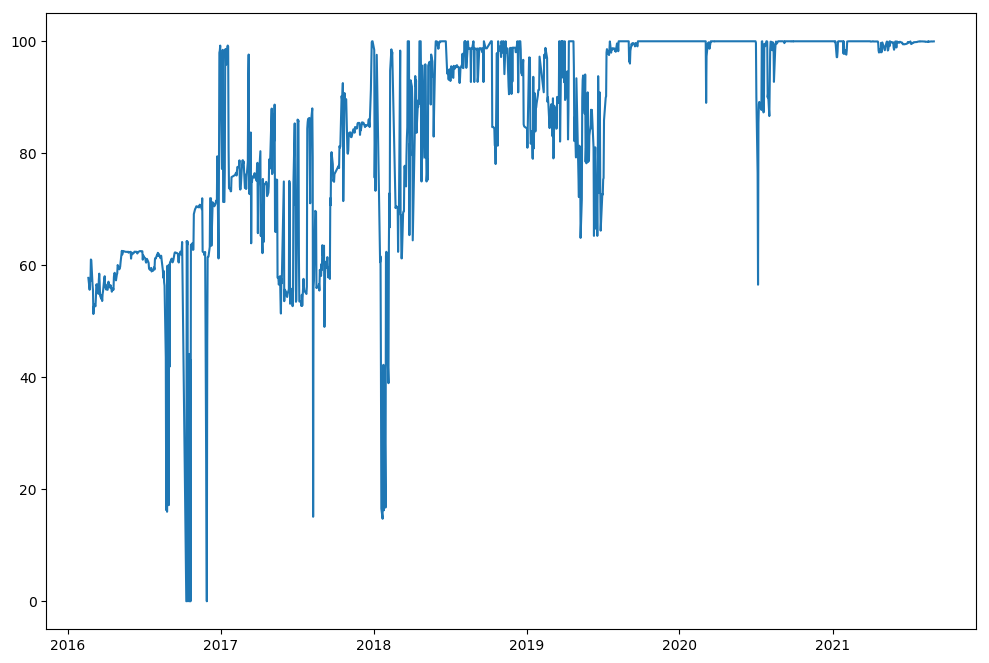

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
x = save_data.index
y = save_data['PD']*100
plt.plot(x,y)
plt.show()

In [44]:
save_data2 = save_data.loc[:,['total_mv','股权价值波动率','负债账面价值','rf','V_a','sigma_a','DD','PD']]

In [45]:
save_data2.to_excel('taihe_data.xlsx')